In [7]:
import pandas as pd
import numpy as np

### Opening the .csv

In [8]:
df = pd.read_csv('results-survey.csv')

df.drop(columns=df.iloc[:,1:6].columns.tolist(), axis=1, inplace=True)

In [9]:
# checking if all consents were signed
if (df.iloc[:, 1:11] == 'no').any(axis=1).any():
    print("Not all participants signed the consents.")
else:
    print("All participants signed the consents and fulfill all the requirements.")
    
    
df.drop(columns=df.iloc[:,1:11].columns.tolist(), axis=1, inplace=True)
df.drop(columns=df.iloc[:,2:8].columns.tolist(), axis=1, inplace=True)

df.drop(columns=df.columns[-1], inplace=True)

All participants signed the consents and fulfill all the requirements.


In [10]:
df.loc[df.iloc[:, 1] == 'Cognitive Science Bachelor program at the Osnabrück University', df.columns[1]] = int(0) #Bachelor
df.loc[df.iloc[:, 1] == 'Cognitive Science Master program at the Osnabrück University', df.columns[1]] = int(1) #Master

def into_liekert(col_index):
    df.loc[df.iloc[:, col_index] == 'Strongly disagree (1)', df.columns[col_index]] = int(1)
    df.loc[df.iloc[:, col_index] == 'Disagree (2)', df.columns[col_index]] = int(2)
    df.loc[df.iloc[:, col_index] == 'Somewhat disagree (3)', df.columns[col_index]] = int(3)
    df.loc[df.iloc[:, col_index] == 'Neutral (4)', df.columns[col_index]] = int(4)
    df.loc[df.iloc[:, col_index] == 'Somewhat agree (5)', df.columns[col_index]] = int(5)
    df.loc[df.iloc[:, col_index] == 'Agree (6)', df.columns[col_index]] = int(6)
    df.loc[df.iloc[:, col_index] == 'Strongly agree (7)', df.columns[col_index]] = int(7)
    df.loc[df.iloc[:, col_index] == 'Not Applicable (8)', df.columns[col_index]] = int(8)

    return df

for indices in range(2,6):
    into_liekert(indices)   

def into_liekert_parentheses(col_index):
    column = df.iloc[:, col_index]

    # Check if the column contains strings
    if pd.api.types.is_string_dtype(column):
        for index, value in column.items():
            if value.startswith('(1)'):
                df.loc[index, df.columns[col_index]] = 1
            elif value.startswith('(2)'):
                df.loc[index, df.columns[col_index]] = 2
            elif value.startswith('(3)'):
                df.loc[index, df.columns[col_index]] = 3
            elif value.startswith('(4)'):
                df.loc[index, df.columns[col_index]] = 4
            elif value.startswith('(5)'):
                df.loc[index, df.columns[col_index]] = 5
            elif value.startswith('(6)'):
                df.loc[index, df.columns[col_index]] = 6
            elif value.startswith('(7)'):
                df.loc[index, df.columns[col_index]] = 7

    return df

into_liekert_parentheses(6)

def into_liekert_single_parenthesis(col_index):
    column = df.iloc[:, col_index]

    # Check if the column contains strings
    if pd.api.types.is_string_dtype(column):
        for index, value in column.items():
            if value.startswith('1)'):
                df.loc[index, df.columns[col_index]] = 1
            elif value.startswith('2)'):
                df.loc[index, df.columns[col_index]] = 2
            elif value.startswith('3)'):
                df.loc[index, df.columns[col_index]] = 3
            elif value.startswith('4)'):
                df.loc[index, df.columns[col_index]] = 4
            elif value.startswith('5)'):
                df.loc[index, df.columns[col_index]] = 5
            elif value.startswith('6)'):
                df.loc[index, df.columns[col_index]] = 6
            elif value.startswith('7)'):
                df.loc[index, df.columns[col_index]] = 7
            elif value.startswith('8)'):
                df.loc[index, df.columns[col_index]] = 8

    return df

into_liekert_single_parenthesis(7)

for indices in range(8, 16):
    into_liekert(indices)

def new_liekert_scale(col_index):
    df.loc[df.iloc[:, col_index] == 'Strongly disagree (1)', df.columns[col_index]] = int(1)
    df.loc[df.iloc[:, col_index] == 'Disagree (2)', df.columns[col_index]] = int(2)
    df.loc[df.iloc[:, col_index] == 'Somewhat disagree (3)', df.columns[col_index]] = int(3)
    df.loc[df.iloc[:, col_index] == 'Neutral (4)', df.columns[col_index]] = int(4)
    df.loc[df.iloc[:, col_index] == 'Somewhat agree (8)', df.columns[col_index]] = int(5)
    df.loc[df.iloc[:, col_index] == 'Agree (5)', df.columns[col_index]] = int(6)
    df.loc[df.iloc[:, col_index] == 'Strongly agree (6)', df.columns[col_index]] = int(7)

    return df


for indices in range(16, 22):
    new_liekert_scale(indices)

for indices in range(22, 30):
    into_liekert_parentheses(indices)


def liekert_reverse(col_index):
    df.loc[df.iloc[:, col_index] == 'Strongly Agree (1)', df.columns[col_index]] = int(7)
    df.loc[df.iloc[:, col_index] == 'Agree (2)', df.columns[col_index]] = int(6)
    df.loc[df.iloc[:, col_index] == 'Somewhat Agree (3)', df.columns[col_index]] = int(5)
    df.loc[df.iloc[:, col_index] == 'Neutral (4)', df.columns[col_index]] = int(4)
    df.loc[df.iloc[:, col_index] == 'Somewhat Disagree (5)', df.columns[col_index]] = int(3)
    df.loc[df.iloc[:, col_index] == 'Disagree (6)', df.columns[col_index]] = int(2)
    df.loc[df.iloc[:, col_index] == 'Strongly Disagree (7)', df.columns[col_index]] = int(1)
    df.loc[df.iloc[:, col_index] == 'Not Applicable (8)', df.columns[col_index]] = int(8)

    return df

for indices in range(30, 39):
    liekert_reverse(indices)

into_liekert_parentheses(39)

for indices in range(40, 49):
    liekert_reverse(indices)

into_liekert_parentheses(49)

def yes_vs_no(col_index):
    df.loc[df.iloc[:, col_index] == 'No', df.columns[col_index]] = int(0)
    df.loc[df.iloc[:, col_index] == 'Yes', df.columns[col_index]] = int(1)

    return df

for indices in range(49, 76):
    yes_vs_no(indices)

for indices in range(76, 85):
    yes_vs_no(indices)

def frequency_scale(col_index):
    df.loc[df.iloc[:, col_index] == '(1) Everyday', df.columns[col_index]] = int(5)
    df.loc[df.iloc[:, col_index] == '(2) Most of the days', df.columns[col_index]] = int(4)
    df.loc[df.iloc[:, col_index] == '(3) Half of the days or slightly more', df.columns[col_index]] = int(3)
    df.loc[df.iloc[:, col_index] == '(4) Some of the days', df.columns[col_index]] = int(2)
    df.loc[df.iloc[:, col_index] == '(5) Never', df.columns[col_index]] = int(1)

    return df

for indices in range(86, 97):
    frequency_scale(indices)

def frequency_scale2(col_index):
    df.loc[df.iloc[:, col_index] == 'At no time (0)', df.columns[col_index]] = int(0)
    df.loc[df.iloc[:, col_index] == 'Some of the time (1)', df.columns[col_index]] = int(1)
    df.loc[df.iloc[:, col_index] == 'Less than half of the time (2)', df.columns[col_index]] = int(2)
    df.loc[df.iloc[:, col_index] == 'More than half of the time (3)', df.columns[col_index]] = int(3)
    df.loc[df.iloc[:, col_index] == 'Most of the time (4)', df.columns[col_index]] = int(4)
    df.loc[df.iloc[:, col_index] == 'All of the time (5)', df.columns[col_index]] = int(5)

    return df

for indices in range(97, 101):
    frequency_scale2(indices)

for indices in range(105, 125):
    yes_vs_no(indices)

print(df.columns[97])


df.head()

WHO5[SQ001]. Over the last two weeks [I have felt cheerful and in good spirits]


,id. Response ID,"StuOs. As we are currently only interested in Cognitive Science students at the Osnarück University, please indicate wich study programm you are currently enrolled in.","LSTestQ5[SQ002]. (If applicable) Here and now, I feel satisfied [with my family life.]","LSTestQ5[SQ003]. (If applicable) Here and now, I feel satisfied [with my relationship/marriage.]","LSTestQ5[SQ004]. (If applicable) Here and now, I feel satisfied [with my job.]","LSTestQ5[SQ005]. (If applicable) Here and now, I feel satisfied [with my education.]","PuLQ1. Right now, I have","mood. Here and now, I feel","LSTestQ4LRITestQ1[SQ002]. Here and now, to what degree you agree with the statements below? [I feel satisfied with my life.]","LSTestQ4LRITestQ1[SQ001]. Here and now, to what degree you agree with the statements below? [I don’t seem to be able to accomplish those things that are really important to me.]",...,"Psy[SQ004]. Are you currently diagnosed and/or struggling with any of these conditions? (Classification according to ICD-10) [F40-F48 Anxiety, dissociative, stress-related, somatoform and other nonpsychotic mental disorders (e.g. Phobic anxiety disorders, Obsessive-compulsive disorder, Dissociative and conversion disorders)]","Psy[SQ005]. Are you currently diagnosed and/or struggling with any of these conditions? (Classification according to ICD-10) [F50-F59 Behavioral syndromes associated with physiological disturbances and physical factors (e.g. Eating disorders, Sleep disorders, Sexual dysfunction)]","Psy[SQ006]. Are you currently diagnosed and/or struggling with any of these conditions? (Classification according to ICD-10) [F60-F69 Disorders of adult personality and behavior (e.g. Specific personality disorders, Impulse disorders, Gender identity disorders)]","Psy[SQ007]. Are you currently diagnosed and/or struggling with any of these conditions? (Classification according to ICD-10) [F70-F79 Intellectual Disabilities (e.g. Mild intellectual disabilities, Moderate intellectual disabilities, Severe intellectual disabilities)]","Psy[SQ008]. Are you currently diagnosed and/or struggling with any of these conditions? (Classification according to ICD-10) [F80-F89 Pervasive and specific developmental disorders (e.g. of speech and language, scholastic skills, motor function)]","Psy[SQ009]. Are you currently diagnosed and/or struggling with any of these conditions? (Classification according to ICD-10) [F90-F98 Behavioral and emotional disorders with onset usually occurring in childhood and adolescence (Attention-deficit hyperactivity disorders, Conduct disorders, Tic disorder)]",Psy[SQ010]. Are you currently diagnosed and/or struggling with any of these conditions? (Classification according to ICD-10) [F99-F99 Unspecified mental disorder],Psy[SQ011]. Are you currently diagnosed and/or struggling with any of these conditions? (Classification according to ICD-10) [Not applicable],Psy[SQ012]. Are you currently diagnosed and/or struggling with any of these conditions? (Classification according to ICD-10) [Prefer not to answer],Education. What is the highest level of education you have completed?
0,21,0,2,8,8,4,4,4,4,3,...,0,0,0,0,0,0,0,0,1,Some University but no degree
1,28,0,7,7,6,6,6,6,7,3,...,0,0,0,0,0,0,0,1,0,Completed Secondary School
2,29,1,2,8,3,7,6,3,5,3,...,1,0,0,0,0,0,0,0,0,University Bachelors Degree
3,34,0,5,8,8,6,6,5,5,2,...,0,0,0,0,0,0,0,1,0,Some University but no degree
4,45,0,6,8,8,6,5,4,2,5,...,0,0,1,0,0,0,0,0,0,Some University but no degree


In [11]:
df = df.loc[:, df.map(lambda x: isinstance(x, (int, float))).all()]

df.dropna(axis=1, how='all', inplace=True)

df.to_excel('data-excel.xlsx', index=False)

In [12]:
df.drop(columns='id. Response ID', inplace=True)

col_list = df.columns

df.columns = range(len(col_list))

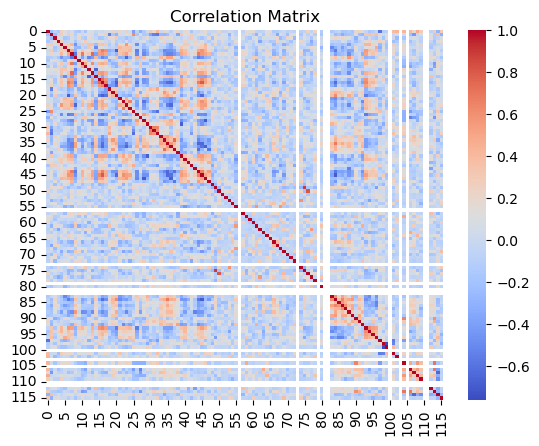

(0, 'StuOs. As we are currently only interested in Cognitive Science students at the Osnarück University, please indicate wich study programm you are currently enrolled in.')
(1, 'LSTestQ5[SQ002]. (If applicable) Here and now, I feel satisfied [with my family life.]')
(2, 'LSTestQ5[SQ003]. (If applicable) Here and now, I feel satisfied [with my relationship/marriage.]')
(3, 'LSTestQ5[SQ004]. (If applicable) Here and now, I feel satisfied [with my job.]')
(4, 'LSTestQ5[SQ005]. (If applicable) Here and now, I feel satisfied [with my education.]')
(5, 'PuLQ1. Right now, I have\xa0')
(6, 'mood. Here and now, I feel')
(7, 'LSTestQ4LRITestQ1[SQ002]. Here and now, to what degree you agree with the statements below? [I feel satisfied with my life.]')
(8, 'LSTestQ4LRITestQ1[SQ001]. Here and now, to what degree you agree with the statements below? [I don’t seem to be able to accomplish those things that are really important to me.]')
(9, 'LSTestQ4LRITestQ1[SQ003]. Here and now, to what degree yo

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import t

# Compute correlation matrix
correlation_matrix = df.corr(method="pearson")

# Visualize the correlation matrix
#plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

for i in list(enumerate(list(col_list))):
    print(i)

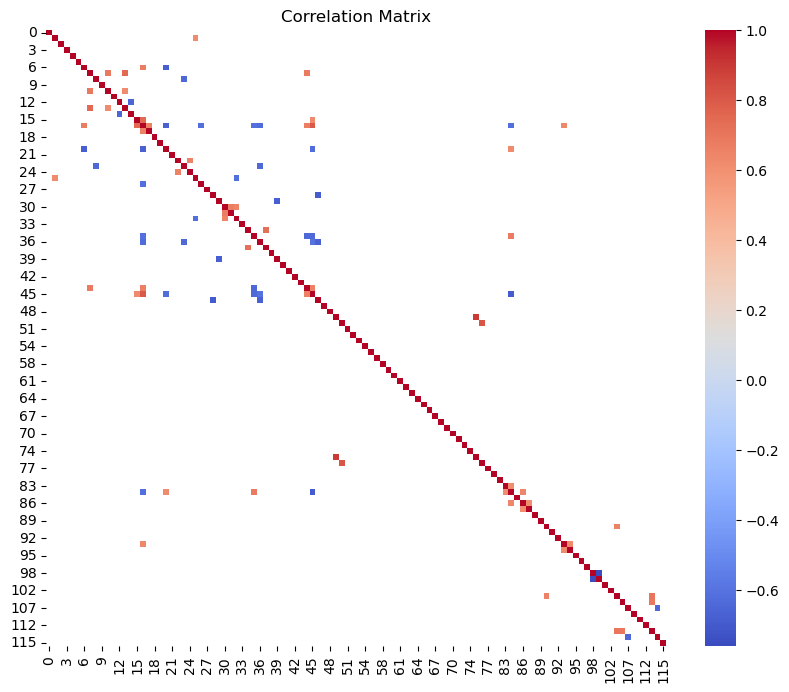

In [14]:
# Set the threshold
threshold = 0.6

# Filter the correlation matrix based on the threshold
strong_correlations = correlation_matrix[abs(correlation_matrix) > threshold]

# This will replace values below the threshold with NaN
# You can further dropna() to remove rows and columns with no strong correlations
strong_correlations = strong_correlations.dropna(axis=0, how='all').dropna(axis=1, how='all')

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(strong_correlations, annot=False, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [35]:
strong_correlations.to_excel('correlations.xlsx')

## 383-108 correlation values above .50
## 95 above .60

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


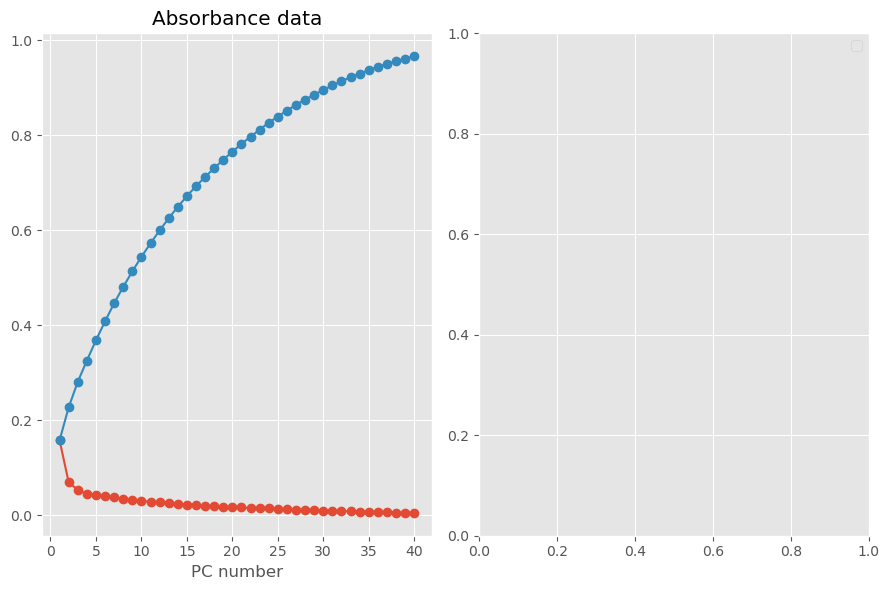

In [23]:
# Import necessary libraries
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer  # Import imputer

# Assuming 'data' is your 2D array or DataFrame with rows as observations and columns as variables

# Step 1: Handle missing values (impute NaN)
imputer = SimpleImputer(strategy='mean')  # You can use other strategies as well
data_without_nan = imputer.fit_transform(df)

# Step 2: Standardize the data (important for PCA)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_without_nan)

# Step 2: Apply PCA
# 20 account for ~77% of the variance
pca = PCA(n_components=40)
principalComponents = pca.fit(scaled_data)

expl_var = principalComponents.explained_variance_ratio_
 
# Plot data
pc_array = np.linspace(1,40,40)
with plt.style.context(('ggplot')):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9,6))
    fig.set_tight_layout(True)
 
    ax.plot(pc_array, expl_var,'-o', label="Explained Variance %")
    ax.plot(pc_array, np.cumsum(expl_var),'-o', label = 'Cumulative variance %')
    ax.set_xlabel("PC number")
    ax.set_title('Absorbance data')
 
    plt.legend()
    plt.show()

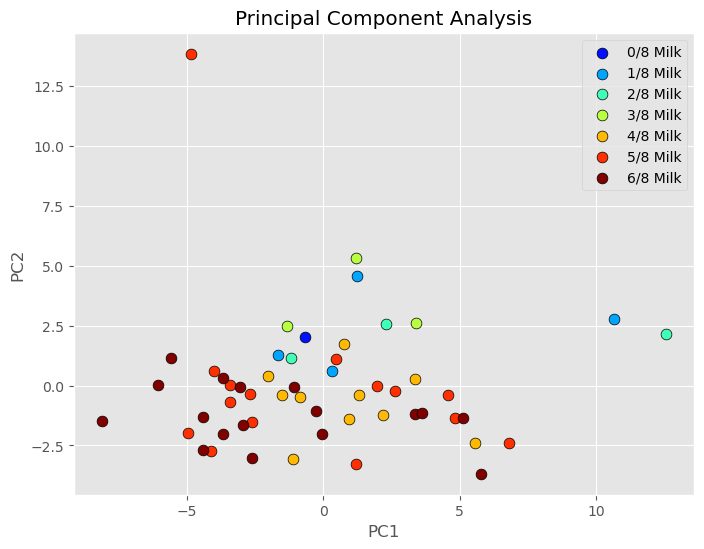

In [25]:
pca = PCA(n_components=10)
 
# Transform on the scaled features
principalComponents = pca.fit_transform(scaled_data)

# Define the labels for the plot legend
labplot = ["0/8 Milk","1/8 Milk","2/8 Milk", "3/8 Milk", \
"4/8 Milk", "5/8 Milk","6/8 Milk","7/8 Milk", "8/8 Milk"]
 

lab = df.values[:,1] 

# Scatter plot
unique = list(set(lab))
colors = [plt.cm.jet(float(i)/max(unique)) for i in unique]
with plt.style.context(('ggplot')):
    plt.figure(figsize=(8,6))
    for i, u in enumerate(unique):
        col = np.expand_dims(np.array(colors[i]), axis=0)
        xi = [principalComponents[j,0] for j in range(len(principalComponents[:,0])) if lab[j] == u]
        yi = [principalComponents[j,1] for j in range(len(principalComponents[:,1])) if lab[j] == u]
        plt.scatter(xi, yi, c=col, s=60, edgecolors='k',label=str(u))
 
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.legend(labplot,loc='upper right')
    plt.title('Principal Component Analysis')
    plt.show()